# Student Performance Indicator

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best Model




## 1. Problem Statement 
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


## 2. Data Collection 
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## 2.1 Import Data and Required Packages

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")


## Import the CSV Data as Pandas DataFrame

In [34]:
df = pd.read_csv("../data/processed/stud copy.csv")


### Show Top 5 records 

In [35]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of Dataset 

In [36]:
df.shape


(1000, 8)

### Summary Statistics  

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


## 2.2  Dataset Information 

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Data Checks to Perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Checking Missing Values

In [38]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Check Duplicates

In [39]:
df.duplicated().sum() 

np.int64(0)

#### No Duplicate in the dataset

###  Check Data Types

In [40]:
#Check Null and Dtyoe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique Values in Each column


In [41]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check Statistics of dataset 

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Insight 

- From above description of numerical data, all means are very close to each other - between 66 and 68.05 
- All standard deviations are also close - between 14.6 and 15.19;
-  While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

## 3.7 Exploring Dataset

In [43]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [44]:
# List of columns and their corresponding labels
columns = {
    'gender': "Categories in 'gender' variable:",
    'race_ethnicity': "Categories in 'race_ethnicity' variable:",
    'parental_level_of_education': "Categories in 'parental level of education' variable:",
    'lunch': "Categories in 'lunch' variable:",
    'test_preparation_course': "Categories in 'test preparation course' variable:"
}

# Loop through the columns and print unique categories
for col, label in columns.items():
    print(f"{label} {df[col].unique()}")


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [45]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns using f-strings for cleaner output
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding Columns for "Total Score" and "Average "

In [46]:
# Calculate total score and average score
df['total_score'] = df[['math_score','reading_score','writing_score']]. sum(axis =1)
df['average'] = df['total_score']/3

df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [47]:
#Dictionary to store the subject names and their respedtive score columns

full_marks_subjects ={
    'Maths': 'math_score',
    'Writing':'writing_score',
    'Reading':'reading_score'
}

#loop through the dictionary to count students with full marks and print the results 
for subject, column in full_marks_subjects.items():
    full_marks_subjects =df[df[column] == 100]['average'].count()
    print(f'Number of Students with full marks in {subject}:{full_marks_subjects}')

Number of Students with full marks in Maths:7
Number of Students with full marks in Writing:14
Number of Students with full marks in Reading:17


In [48]:
low_score_subjects = {
    'Maths': 'math_score',
    'Writing': 'writing_score',
    'Reading':'reading_score'
    
}

# Loop through the dictionary to count students with scores less than or equal to 20
for subect, column in low_score_subjects.items():
    low_score_count = df[df[column] <= 20]['average'].count()
    print (f'Number of student with {subject} score <=20: {low_score_count}')

Number of student with Reading score <=20: 4
Number of student with Reading score <=20: 3
Number of student with Reading score <=20: 1


#### Insight

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## 4. Exploring Data (Visualisation)

### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)
## 4.1.1 Histogram & KDE

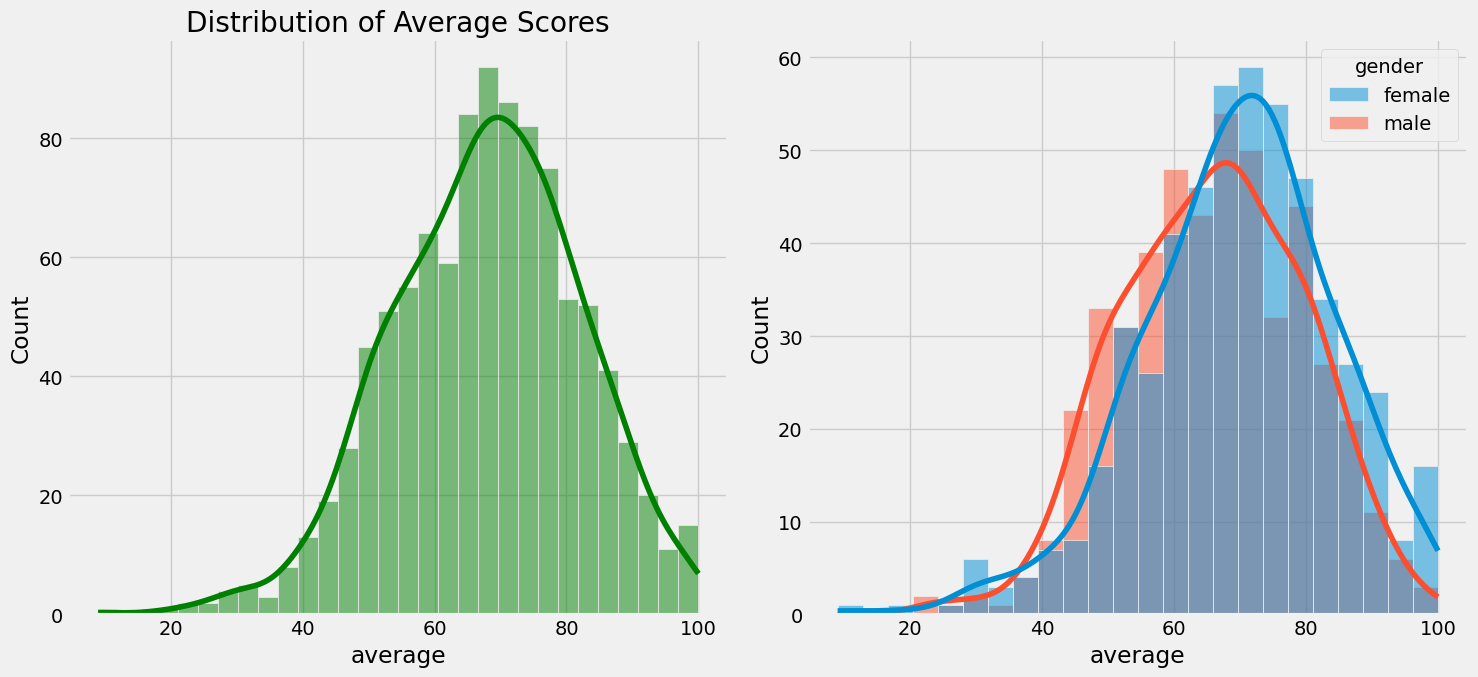

In [49]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(data=df, x='average',bins=30, kde=True, color='g', ax=axs[0])

axs[0].set_title('Distribution of Average Scores')
sns.histplot (data=df, x='average',kde=True, hue='gender', ax=axs[1])

plt.tight_layout()
plt.show()

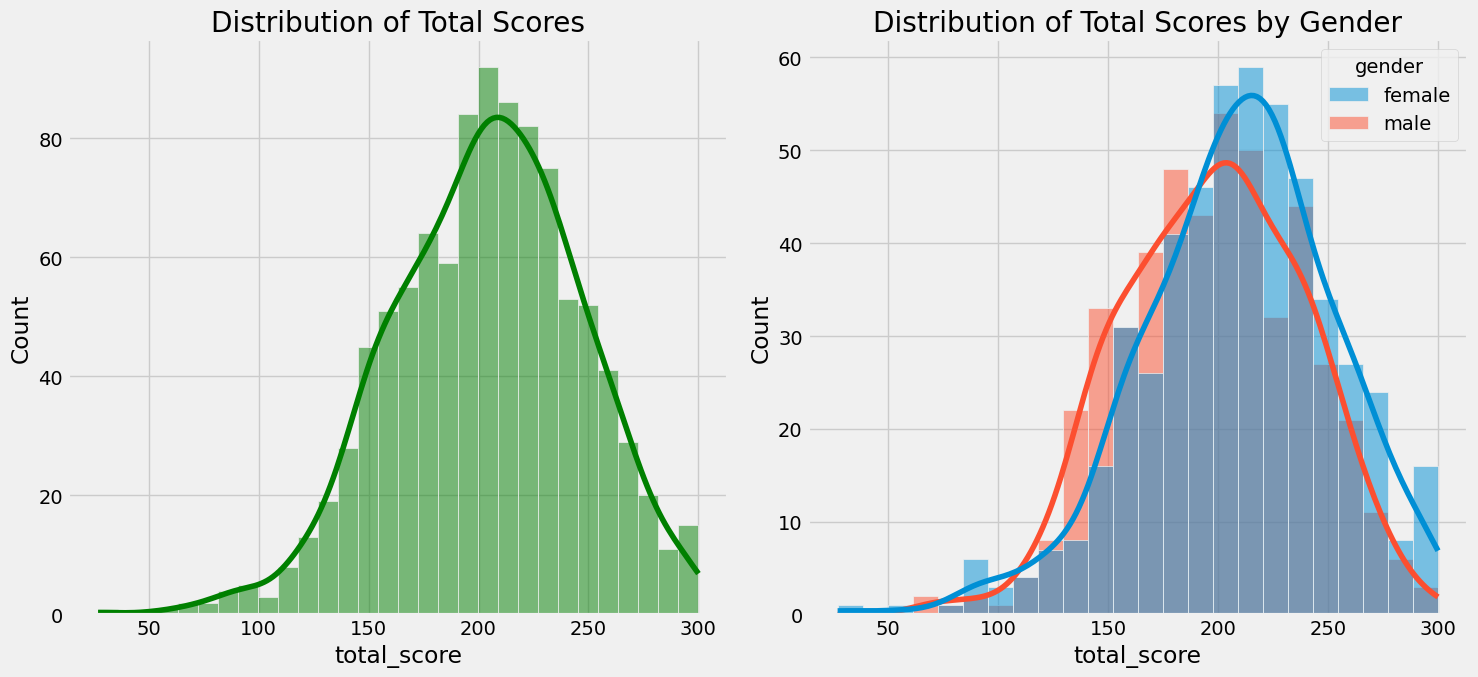

In [50]:


fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Total Scores')


sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of Total Scores by Gender')


plt.tight_layout()  
plt.show()


#### Insight 
- Female students tend to perform well then male students.

<function matplotlib.pyplot.show(close=None, block=None)>

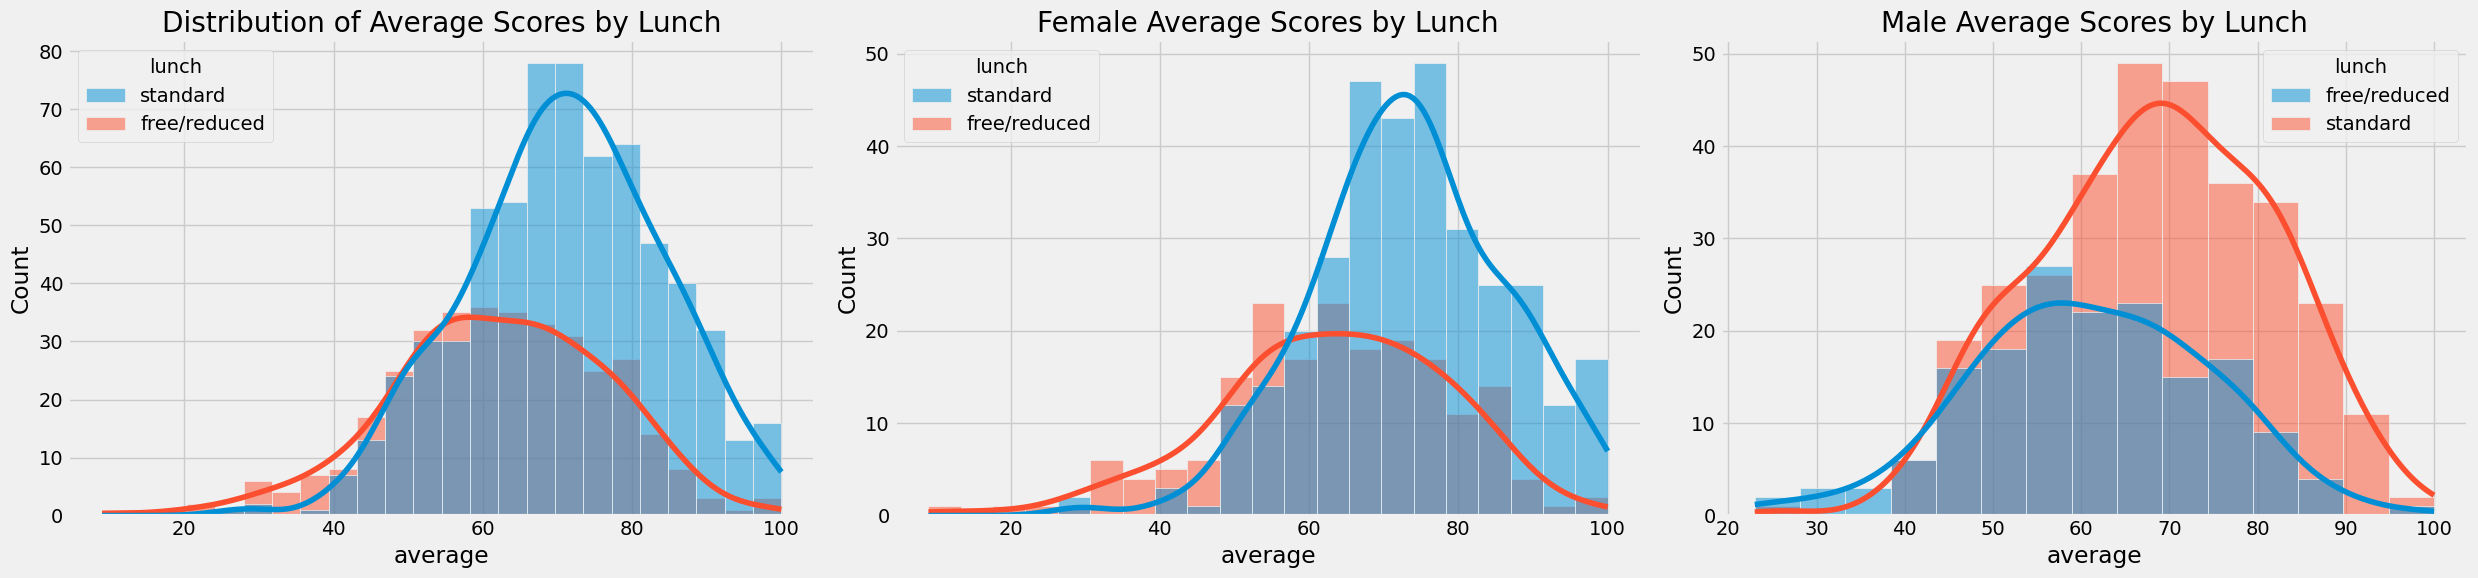

In [51]:
fig, axs = plt.subplots (1, 3, figsize= (25, 6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax= axs[0])
axs[0].set_title ('Distribution of Average Scores by Lunch')

sns.histplot(data=df[df.gender == 'female'], x='average',kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Average Scores by Lunch')

sns.histplot (data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Average Scores by Lunch')

plt.tight_layout()
plt.show

#### Insight 

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

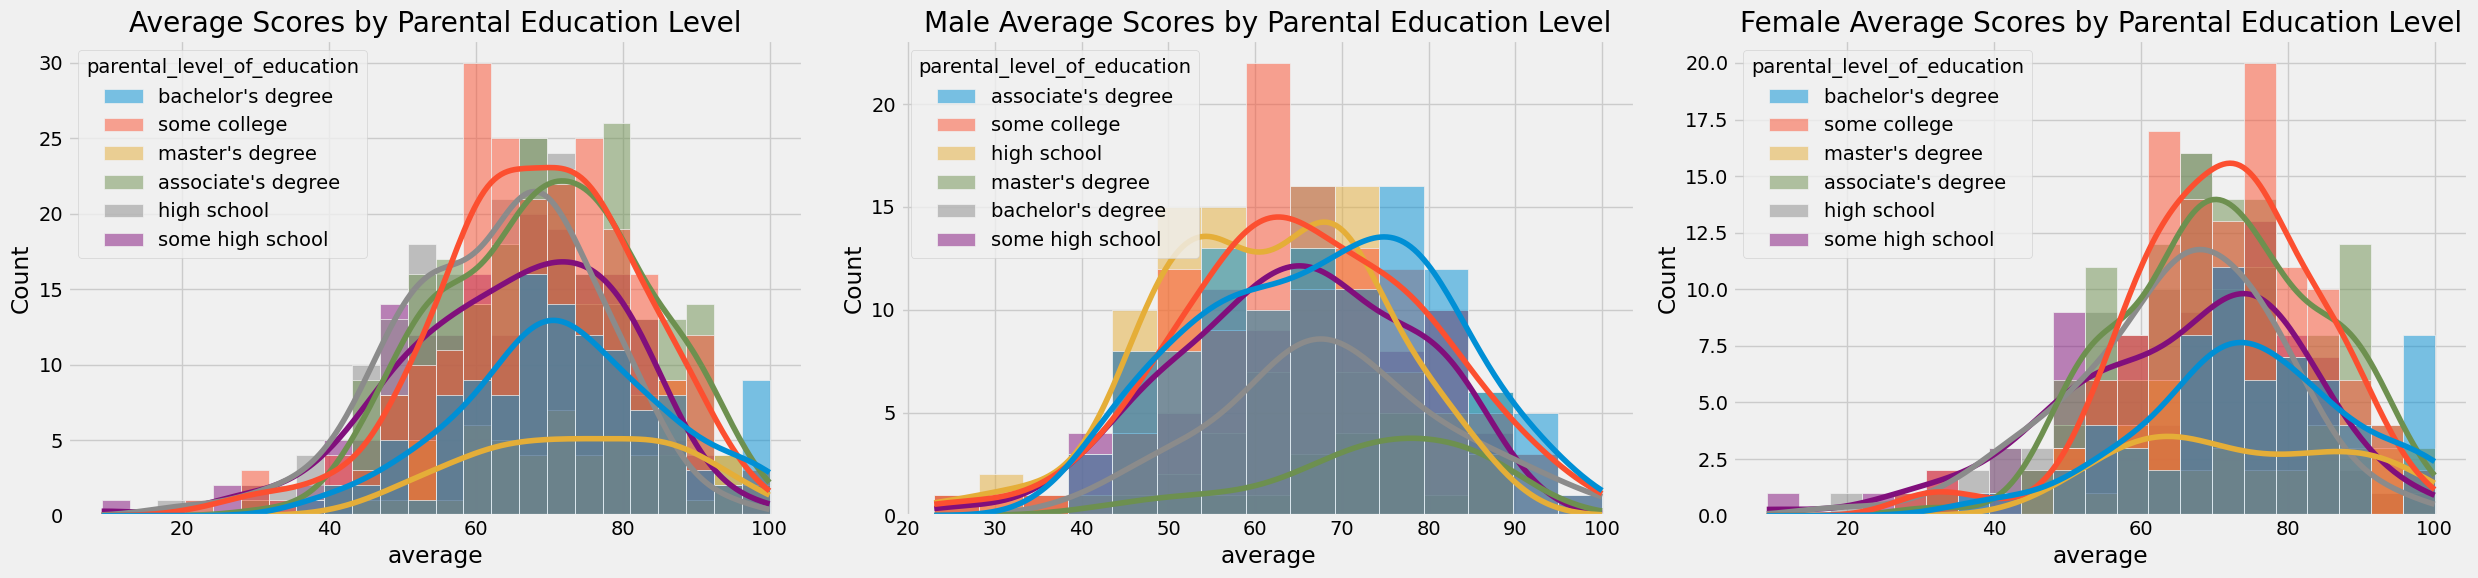

In [52]:

fig, axs = plt.subplots(1, 3, figsize=(25, 6))


sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])
axs[0].set_title('Average Scores by Parental Education Level')

sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('Male Average Scores by Parental Education Level')


sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title('Female Average Scores by Parental Education Level')


plt.tight_layout()
plt.show()


#### Insight 

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.


<function matplotlib.pyplot.show(close=None, block=None)>

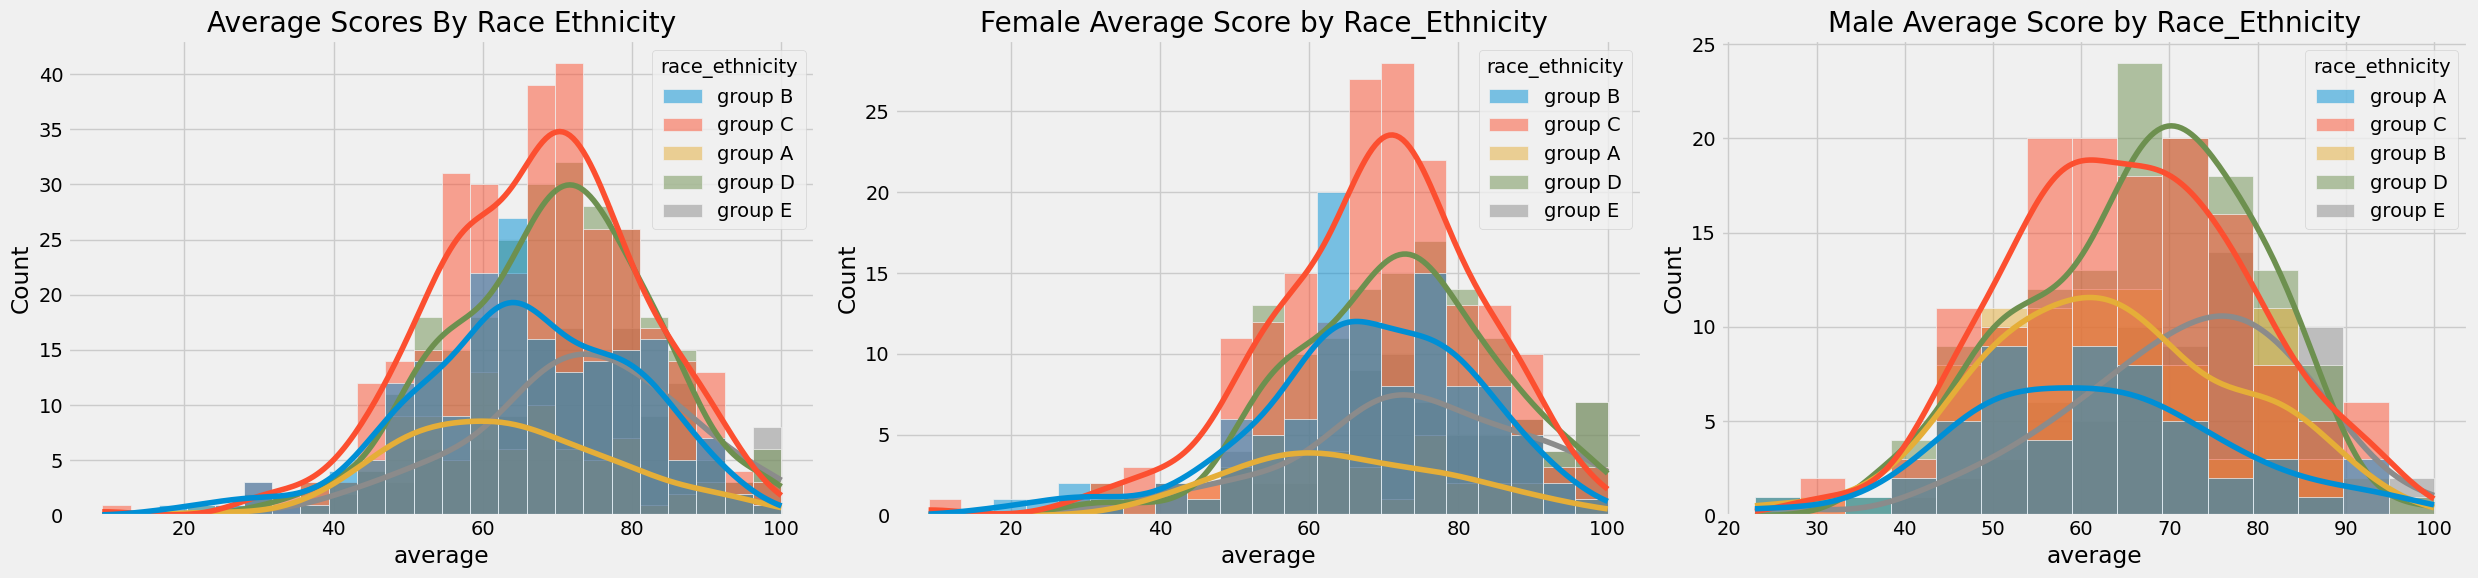

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0])
axs[0].set_title ('Average Scores By Race Ethnicity')

sns.histplot(data=df[df.gender == 'female'], x='average', kde=True,hue='race_ethnicity', ax=axs[1])
axs[1].set_title('Female Average Score by Race_Ethnicity ')

sns.histplot(data=df[df.gender == 'male'], x='average',kde=True, hue='race_ethnicity', ax=axs[2])
axs[2].set_title('Male Average Score by Race_Ethnicity')

plt.tight_layout()
plt.show

####

#### Insight 

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

## 4.2 Maximun Score of students in all three Subjects

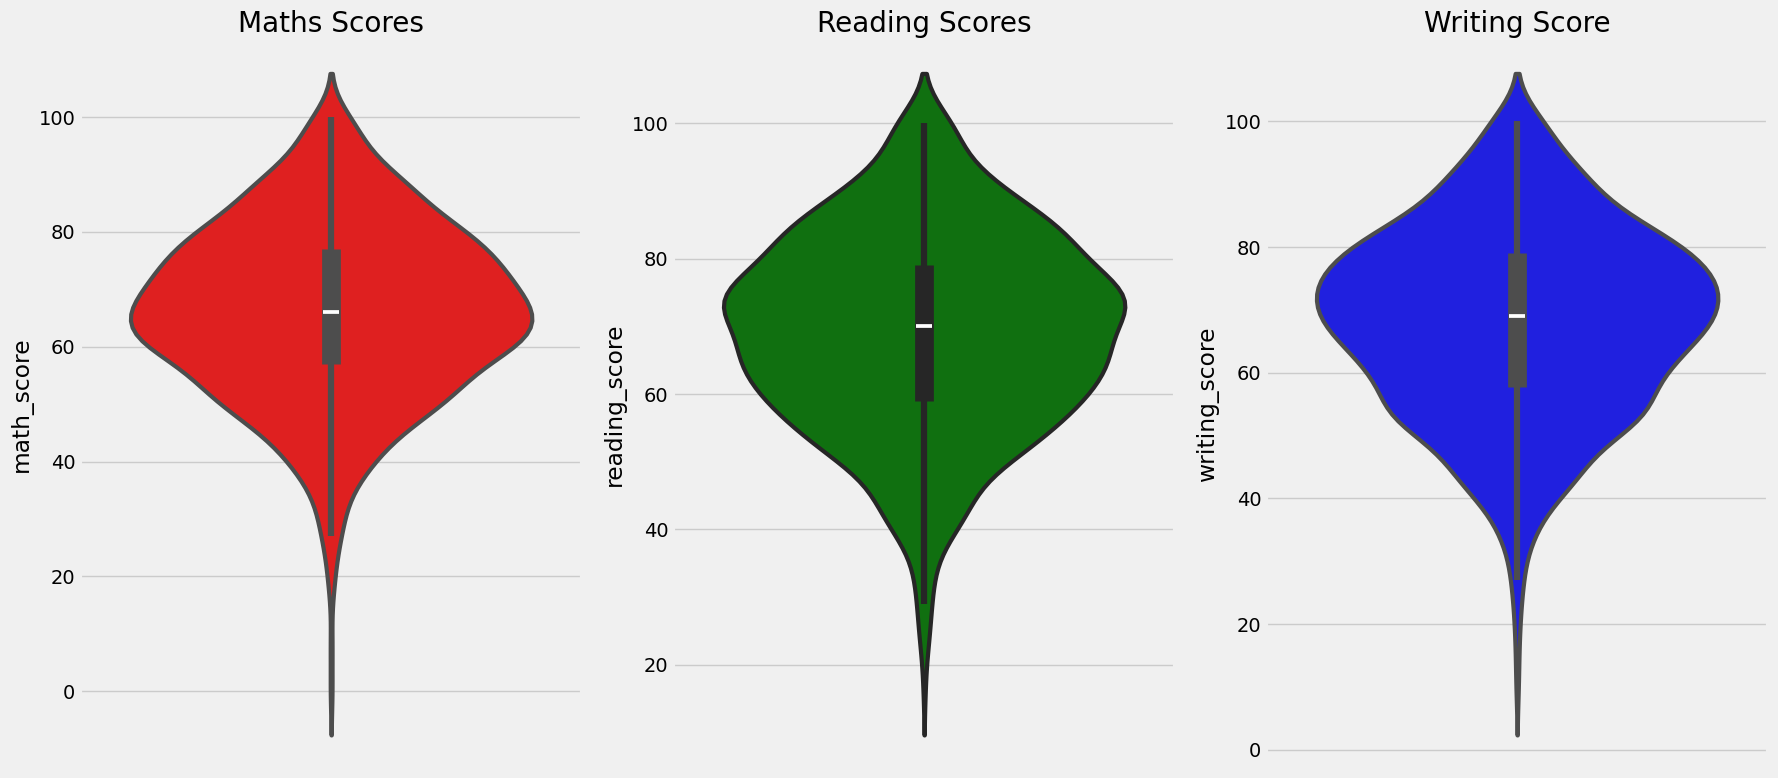

In [54]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.title ('Maths Scores')
sns.violinplot(y='math_score',data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)
plt.title ('Reading Scores')
sns.violinplot(y= 'reading_score',data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('Writing Score')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()

#### Insight 
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## Multivariate Analysis Using Pieplot 

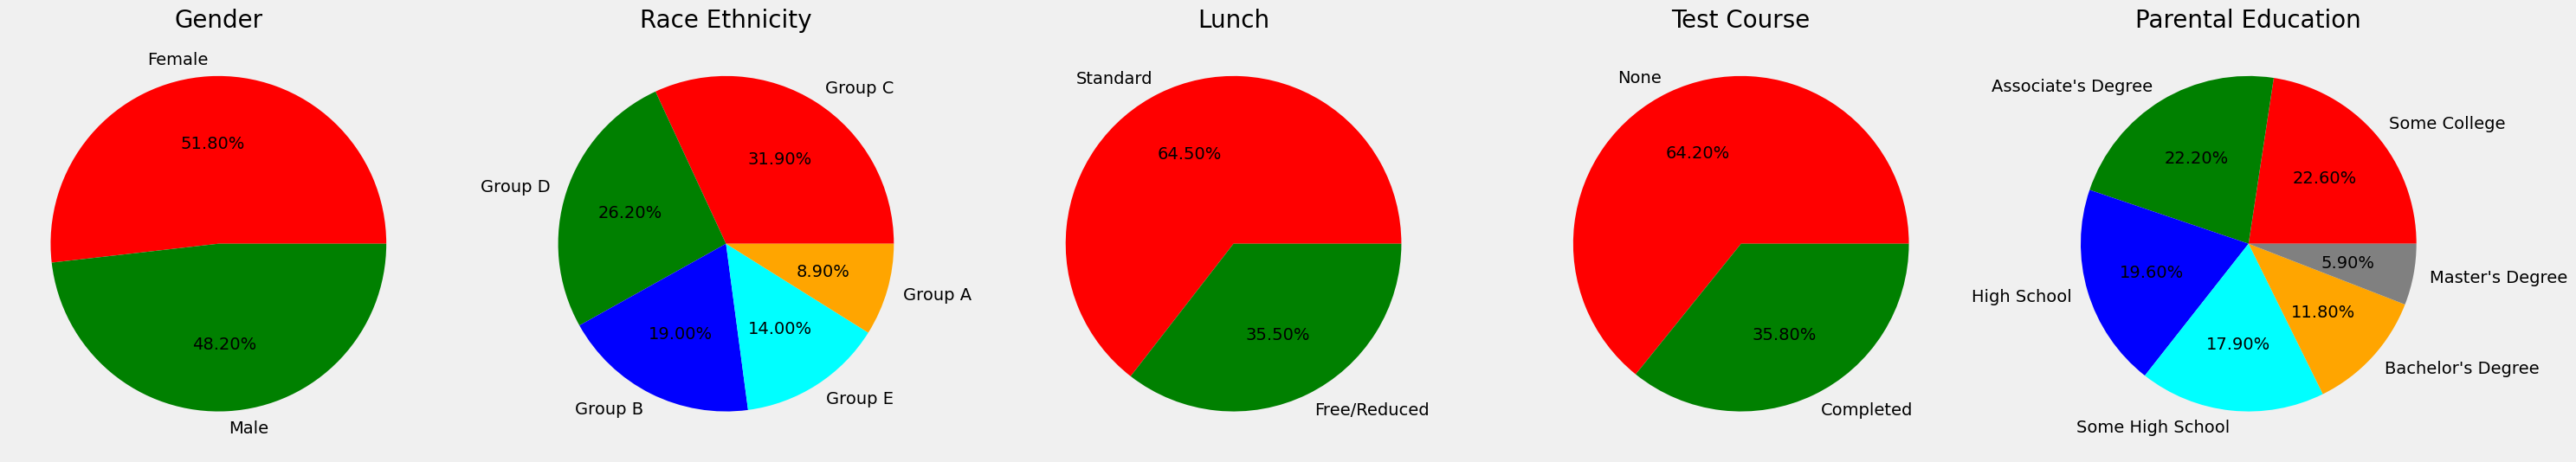

In [55]:
# Set figure size
plt.rcParams['figure.figsize'] = (30, 12)

# Plot 1: Gender distribution
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Plot 2: Race/Ethnicity distribution
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Race Ethnicity', fontsize=20)
plt.axis('off')

# Plot 3: Lunch distribution
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Plot 4: Test Preparation Course distribution
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Plot 5: Parental Level of Education distribution
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


#### Insight 

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature Wise Visualisation 

### 4.4.1 Gender Column 

- How is the Gender distributed
- Does Gender have any impact of students performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

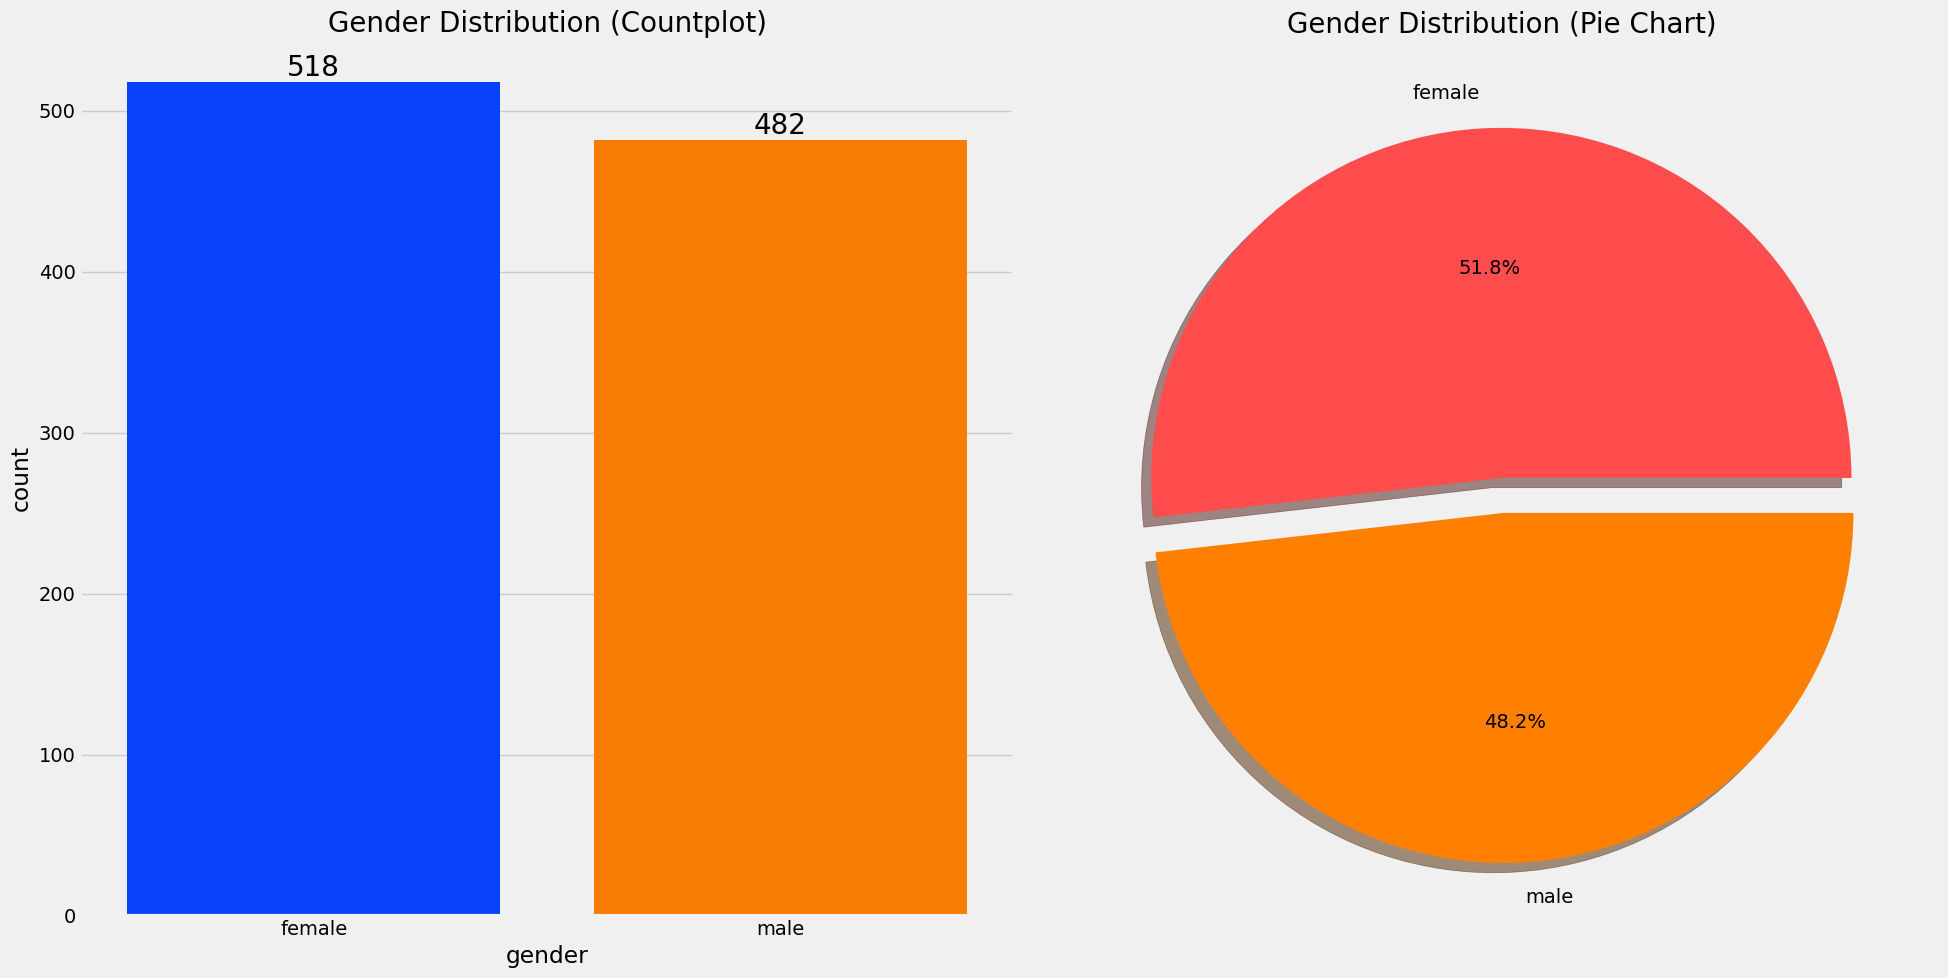

In [56]:

f, ax = plt.subplots(1, 2, figsize=(20, 10))


sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Gender Distribution (Countplot)', fontsize=20)


for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)


gender_counts = df['gender'].value_counts()
ax[1].pie(x=gender_counts, labels=gender_counts.index, explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
ax[1].set_title('Gender Distribution (Pie Chart)', fontsize=20)

plt.tight_layout()
plt.show()


###  Insight 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

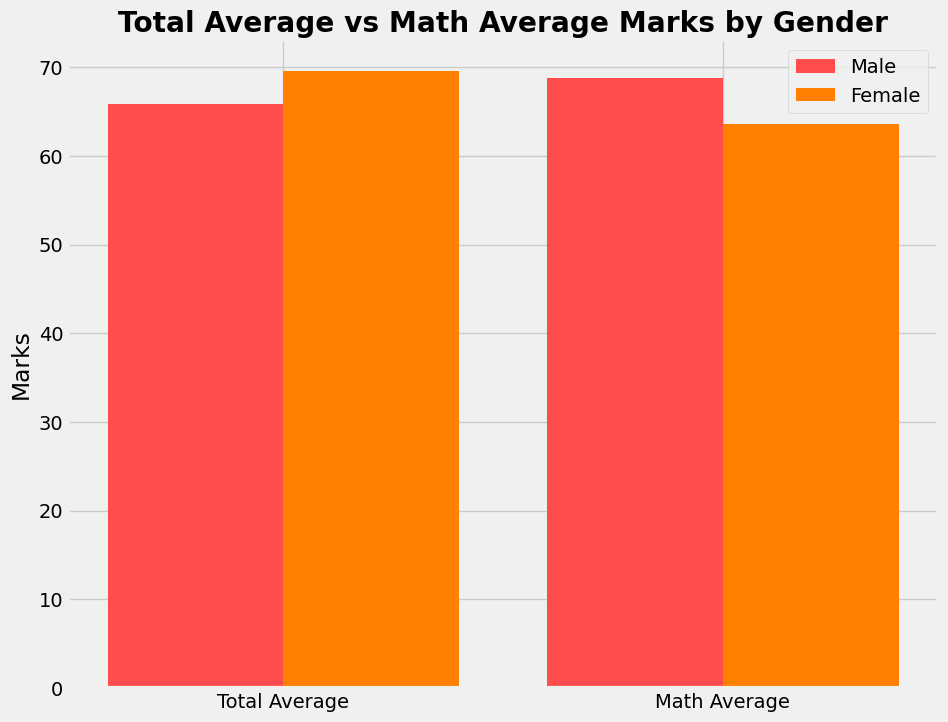

In [57]:


numeric_columns = df.select_dtypes(include=['number'])


gender_group = numeric_columns.groupby(df['gender']).mean()
plt.figure(figsize=(10, 8))

# Define x-axis labels (categories)
X = ['Total Average', 'Math Average']

# Fetching the scores for female and male using .loc[]
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

# Define positions on the x-axis
X_axis = np.arange(len(X))
  
# Plot bars for male and female scores
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='#ff4d4d')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='#ff8000')
  
# Set the x-axis ticks and labels
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold')

# Add a legend for clarity
plt.legend()

# Display the plot
plt.show()


#### Insight 

- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

## 4.4.2 RACE/EHNICITY COLUMN

- How is the Gender column distributed ?
- Does gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Gender column distributed ?)

Text(0.5, 1.0, 'Race-Ethnicity Distribution (Pie Chart)')

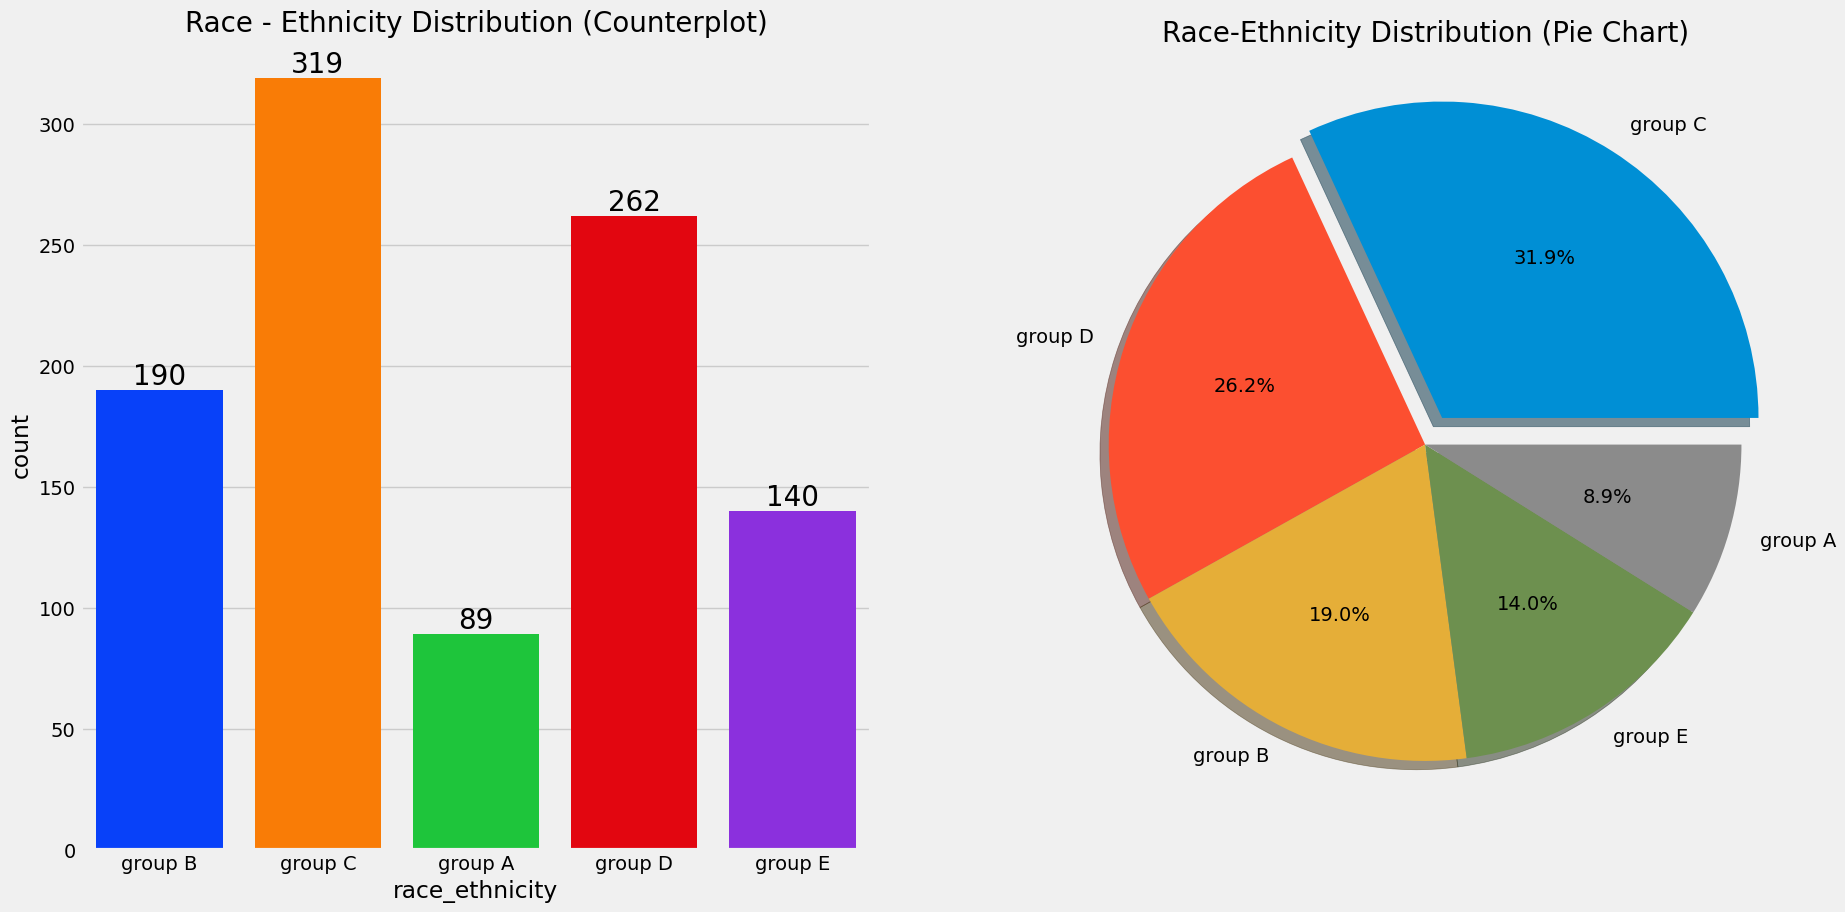

In [58]:
f, ax =plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0], saturation= 0.95)
ax[0].set_title('Race - Ethnicity Distribution (Counterplot)', fontsize=20)

for container in ax[0]. containers:
    ax[0].bar_label(container, color='black', size=20)

race_counts = df['race_ethnicity'].value_counts()
ax[1].pie(x=race_counts, labels= race_counts.index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
ax[1].set_title('Race-Ethnicity Distribution (Pie Chart)', fontsize=20)


### Insight 
- Most of the student belonging from group C and group D.
- Lowest number of students belong to groupA.

### Bavariate Analysis (Does Race - Ehnicity has any impact on student's performance ? )

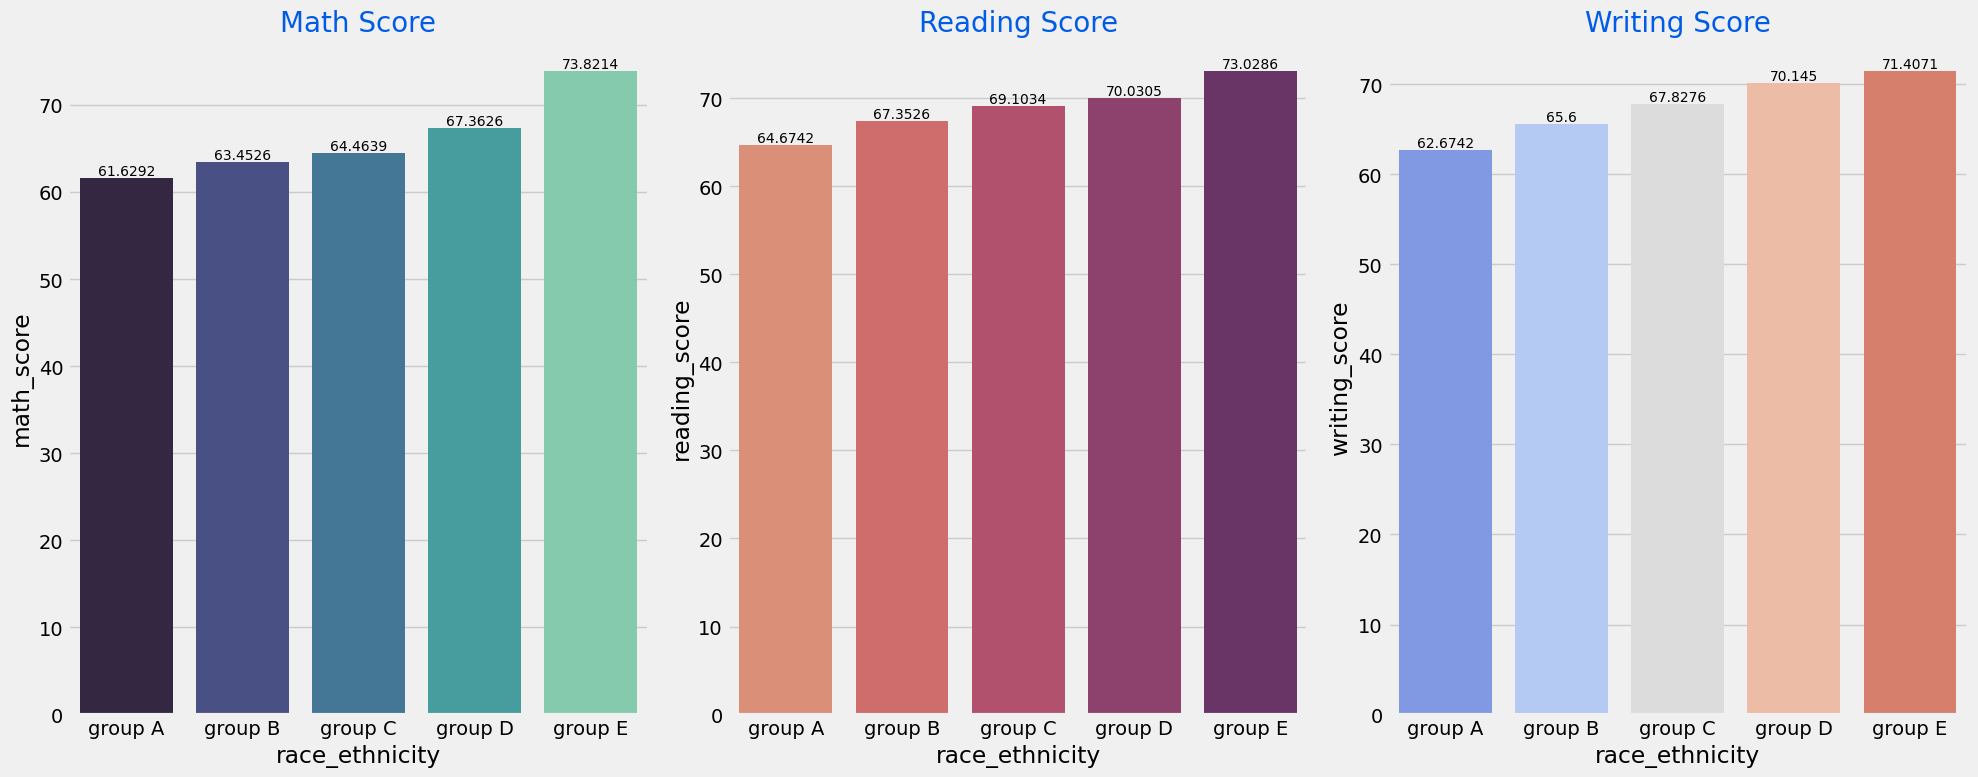

In [59]:
# Select only numeric columns from the dataframe
numeric_columns = df.select_dtypes(include='number')

group_data2 = numeric_columns.groupby(df['race_ethnicity']).mean()

f, ax = plt.subplots (1, 3, figsize=(20, 8))

# Math score barplot
sns.barplot(x=group_data2.index, y=group_data2['math_score'], palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color= '#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=10)
    
# Reading score barplot
sns.barplot(x=group_data2.index, y=group_data2['reading_score'], palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)
    
# Writing score barplot
sns.barplot(x=group_data2.index, y=group_data2['writing_score'], palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10)

# Adjust layout
plt.tight_layout()
plt.show()


### Insights

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

- What is the educational background of student's parent ?
- Does parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS (what is the educational Background of student Parent)

<function matplotlib.pyplot.show(close=None, block=None)>

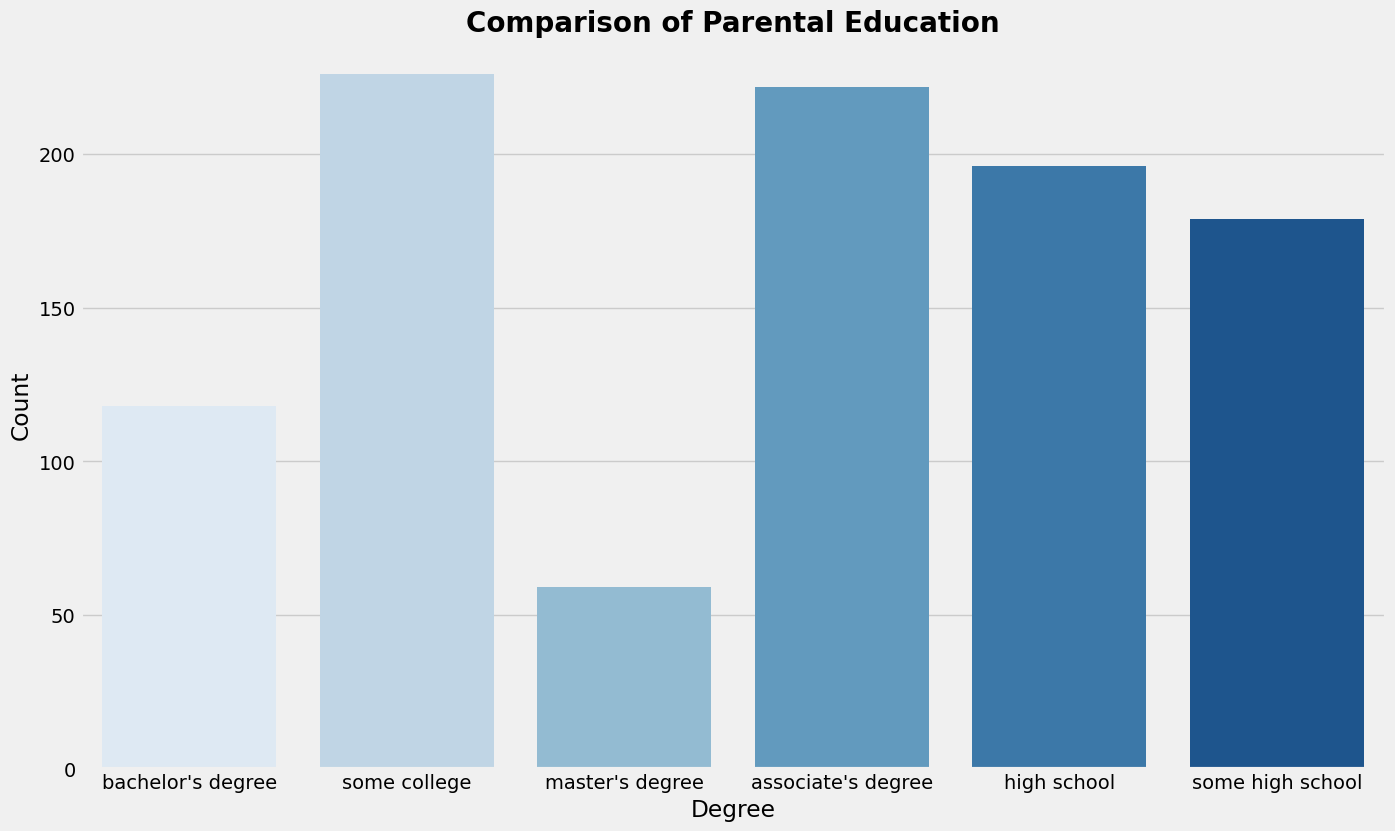

In [60]:
plt.rcParams['figure.figsize']=(15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

plt.title('Comparison of Parental Education', fontweight='bold',fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show

#### Insight 
- Students whose parent had some college degree did better 

### BIVARIATE ANALYSIS (Does parental education has any impact on student's performance ?)



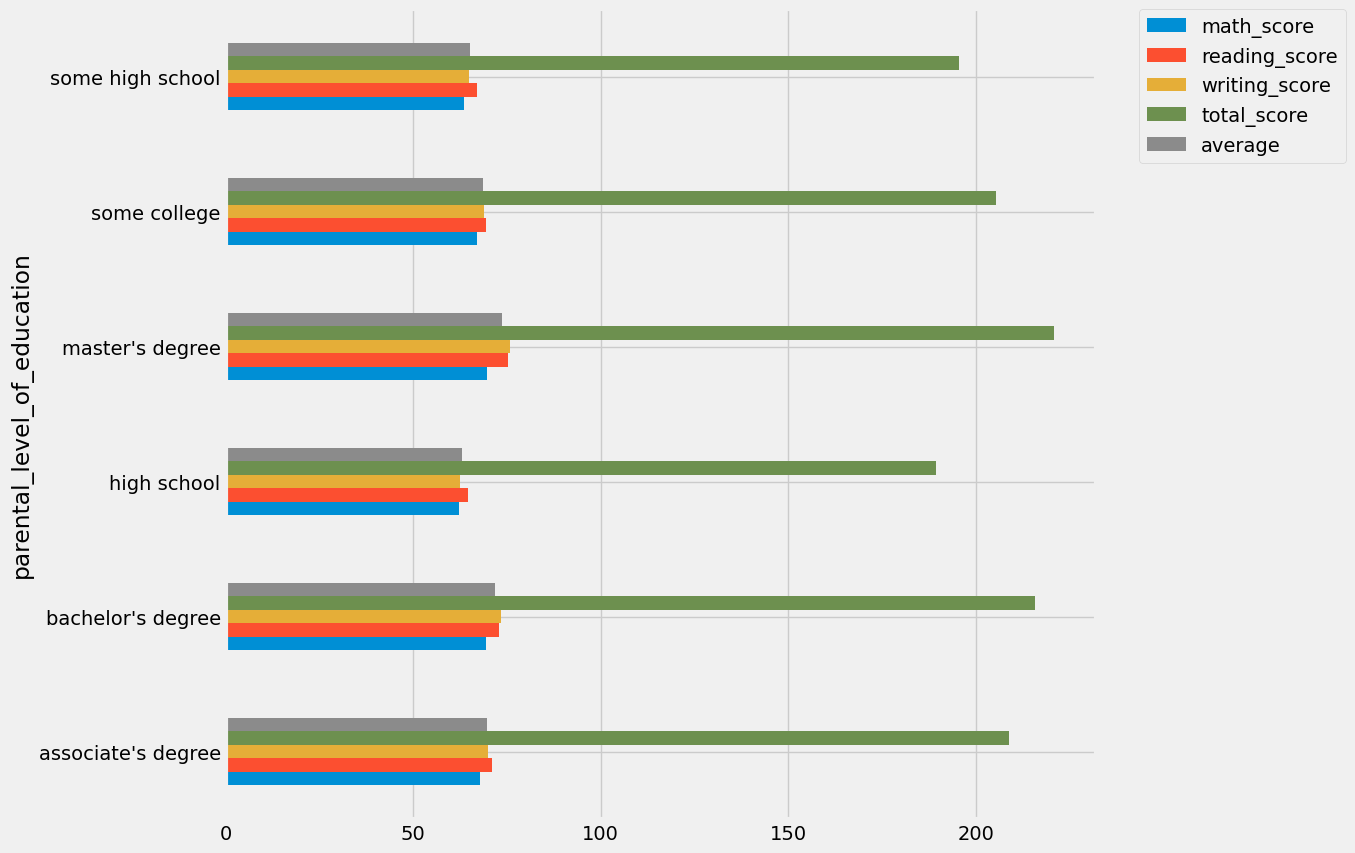

In [61]:
df_numeric = df.select_dtypes(include='number')

grouped_data = df_numeric.groupby(df['parental_level_of_education']).mean()

grouped_data.plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

#### Insight 
- The data supports the hypothesis that parental education level has a strong positive correlation with student performance across all subjects. Additionally, math scores seem to dominate regardless of parental education, while reading and writing scores remain closely linked.



## 4.4.4 LUNCH COLUMN
- Which type of lunch is most common among students ?
- What is the effect of lunch type on performance results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common among students ? )

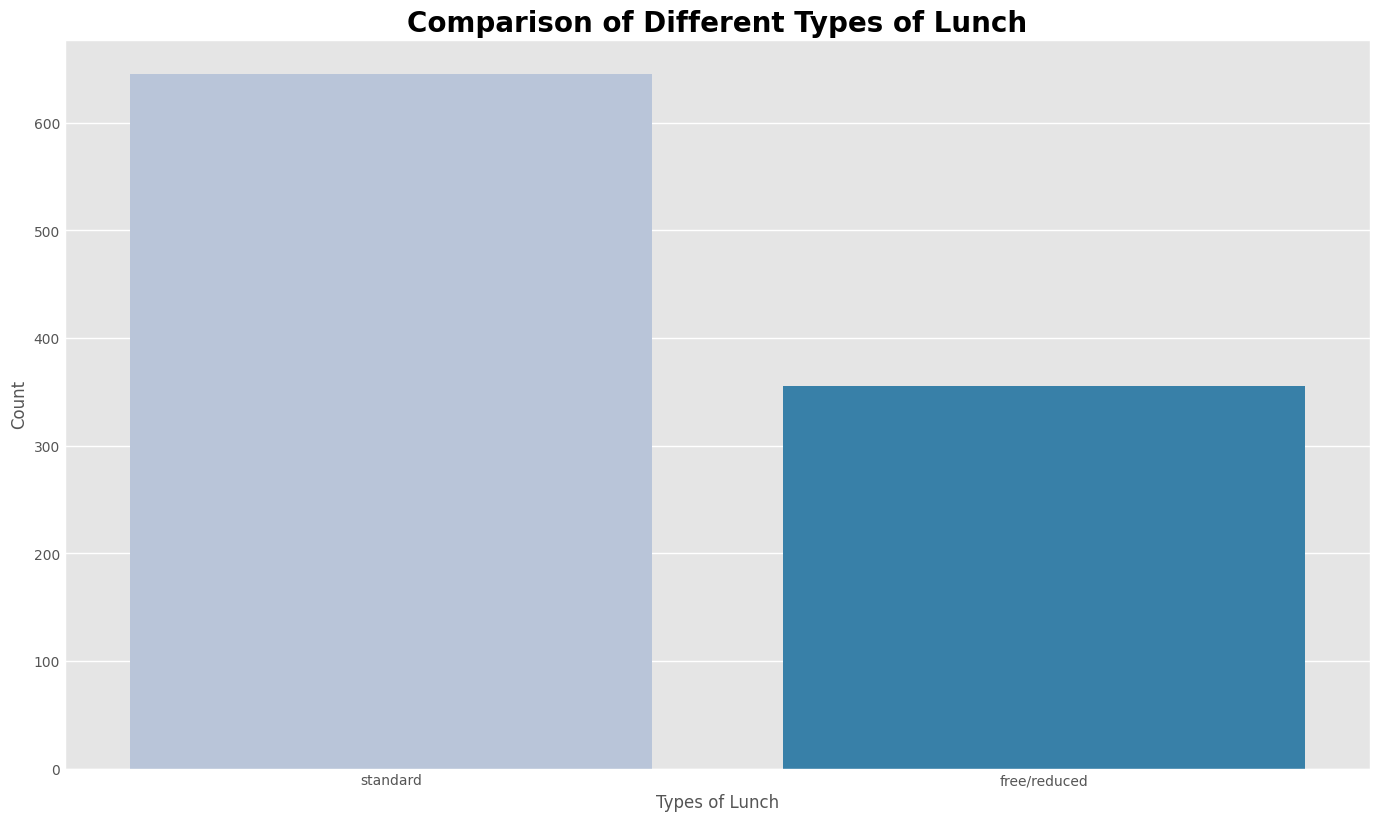

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = (15, 9)


plt.style.use('ggplot')  


sns.countplot(x='lunch', data=df, palette='PuBu')


plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Show plot
plt.show()


#### Insight 
- Students with Standard lunch performed better than Students with free/ reduced lunchs 